# Task D: Come closer, darling!, Eccentric orbits

In [1]:
import numpy as np
from fireworks.ic import ic_two_body
import matplotlib.pyplot as plt
from fireworks.nbodylib.integrators import integrator_euler, integrator_leapfrog, integrator_rungekutta
from fireworks.nbodylib.dynamics import acceleration_direct_vectorized #, acceleration_direct, acceleration_pyfalcon, acceleration_jerk_direct

#from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

We have to choose the initial conditions of our system, namely the two masses, the distance $r$ and the eccentricity $e$. We will consider the three cases $e=0.5$, $e=0.9$ and $e=0.99$ separately. 

In [2]:
mass1 = 1.
mass2 = 2.
rp = 5. 
e_1 = 0.5               
e_2 = 0.9
e_3 = 0.99

part_1 = ic_two_body(mass1, mass2, rp, e_1)
part_2 = ic_two_body(mass1, mass2, rp, e_2)
part_3 = ic_two_body(mass1, mass2, rp, e_3)

### Estimate the period

To estimate the period we use:
$$
P = \sqrt{\frac{4\pi^2a^3}{GM}}
$$
Since we're working in Nbody-units we can get rid of the constant $G$. The semi-major axis $a$ comes from $r_p = a(1-e)$. $M$ is the total mass of the system. We will use this procedure for all three values of $e$.

In [3]:
M_tot_1 = np.sum(part_1.mass)
M_tot_2 = np.sum(part_2.mass)
M_tot_3 = np.sum(part_3.mass)

# e = 0.5 
a_1 = rp / (1 - e_1)
P_1 = np.sqrt((4 * np.pi**2. * a_1**3.)/(M_tot_1))
print('P_1 = ', P_1)

# e = 0.9
a_2 = rp / (1 - e_2)
P_2 = np.sqrt((4 * np.pi**2. * a_2**3.)/(M_tot_2))
print('P_2 = ', P_2)

# e = 0.99 
a_3 = rp / (1 - e_3)
P_3 = np.sqrt((4 * np.pi**2. * a_3**3.)/(M_tot_3))
print('P_3 = ', P_3)

P_1 =  114.71474419090953
P_2 =  1282.5498301618645
P_3 =  40557.78675973606


So, with the initial conditions we gave as imput, we get:

$ P_1 = 114.71$ 

$ P_2 = 1282.55$ 

$ P_3 = 40557.79$ 

### Evolution of the binary system

We have now to evolve the binary systems from $0$ to $10\cdot P$. To do so we use the three different integrators we implemented: the Euler, the Leapfrog and the Runge-Kutta, along with our function `acceleration_direct_vectorized` to estimate the acceleration, exactly as done before.

In [4]:
a = np.copy(acceleration_direct_vectorized)
print(a)


<function acceleration_direct_vectorized at 0xffff41415480>


### EULER METHOD

/root/miniconda3/lib/python3.10/site-packages/fireworks-0.0.5-py3.10.egg/fireworks/nbodylib/dynamics.py:188: RuntimeWarning: invalid value encountered in divide


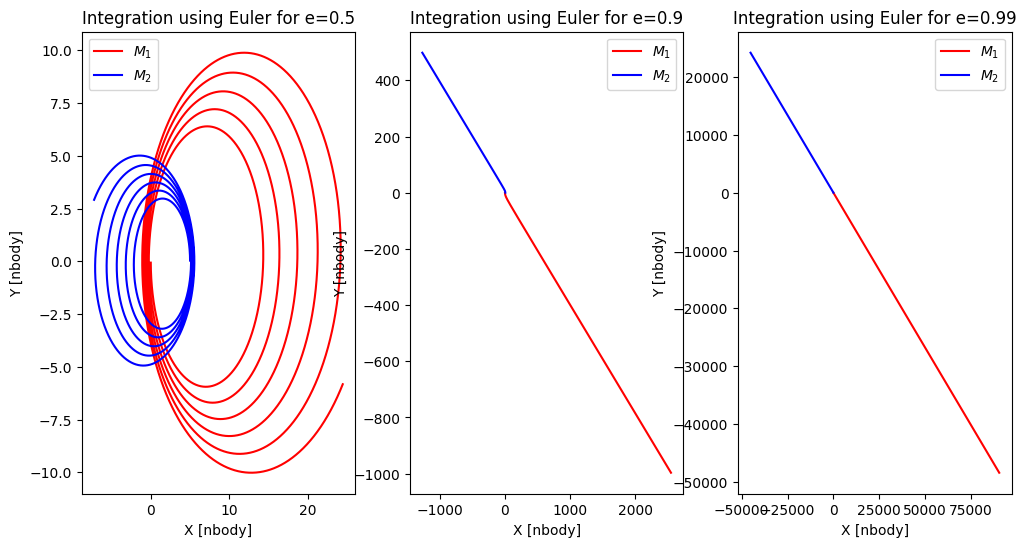

In [5]:
# EULER
 
h_1 = 0.1                   # timestep for e=0.5
h_2 = 1                     # timestep for e=0.9
h_3 = 1                     # timestep for e=0.99
tsimulation_1 = 10*P_1      # end of the simulation for e = 0.5
tsimulation_2 = 10*P_2      # end of the simulation for e = 0.9
tsimulation_3 = 10*P_3      # end of the simulation for e = 0.99
N = 2                       # number of particles

plt.figure(figsize=(12,6))


#e = 0.5

#initialize
t = 0                       
path_1 = []
path_2 = []

while t < tsimulation_1:
    for j in range(1,N):
        result = integrator_euler(part_1, h_1, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
    t += h_1

path_1 = np.array(path_1)
path_2 = np.array(path_2)

#PLOT e = 0.5
plt.subplot(1,3,1)
plt.title('Integration using Euler for e=0.5')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()


#e = 0.9

#initialize
t = 0                       
path_1 = []
path_2 = []

while t < tsimulation_2:
    for j in range(1,N):
        result = integrator_euler(part_2, h_2, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
    t += h_2

path_1 = np.array(path_1)
path_2 = np.array(path_2)

#PLOT e = 0.9
plt.subplot(1,3,2)
plt.title('Integration using Euler for e=0.9')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()



#e = 0.99

#initialize
t = 0                       
path_1 = []
path_2 = []

while t < tsimulation_3:
    for j in range(1,N):
        result = integrator_euler(part_3, h_3, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
    t += h_3

path_1 = np.array(path_1)
path_2 = np.array(path_2)


#PLOT e = 0.99
plt.subplot(1,3,3)
plt.title('Integration using Euler for e=0.99')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()


plt.show()


### LEAPFROG METHOD

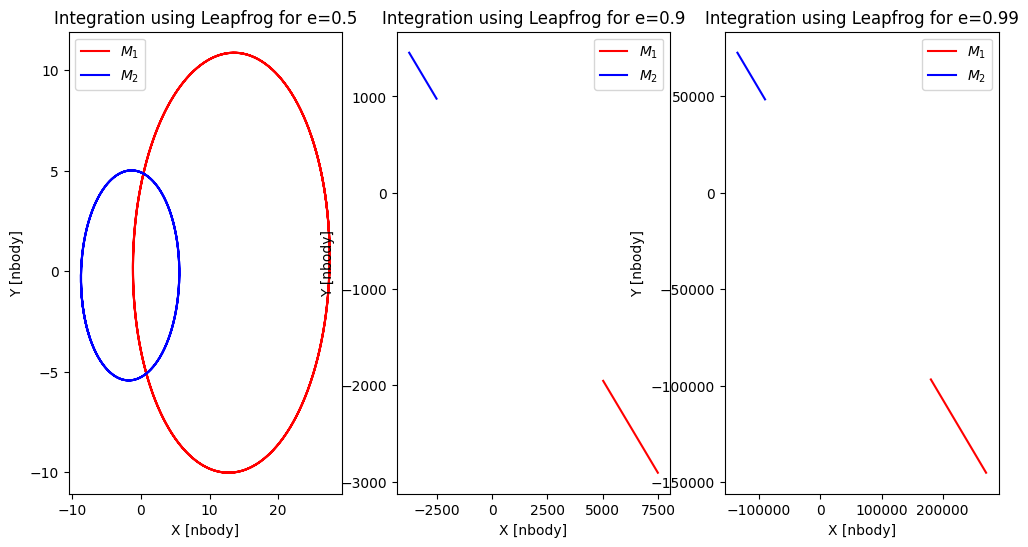

In [8]:
# LEAPFROG
 
h_1 = 0.1                   # timestep for e=0.5
h_2 = 1                     # timestep for e=0.9
h_3 = 1                     # timestep for e=0.99
tsimulation_1 = 10*P_1      # end of the simulation for e = 0.5
tsimulation_2 = 10*P_2      # end of the simulation for e = 0.9
tsimulation_3 = 10*P_3      # end of the simulation for e = 0.99
N = 2                       # number of particles

plt.figure(figsize=(12,6))


#e = 0.5

#initialize
t = 0                       
path_1 = []
path_2 = []

while t < tsimulation_1:
    for j in range(1,N):
        result = integrator_leapfrog(part_1, h_1, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
    t += h_1

path_1 = np.array(path_1)
path_2 = np.array(path_2)

#PLOT e = 0.5
plt.subplot(1,3,1)
plt.title('Integration using Leapfrog for e=0.5')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()


#e = 0.9

#initialize
t = 0                       
path_1 = []
path_2 = []

while t < tsimulation_2:
    for j in range(1,N):
        result = integrator_leapfrog(part_2, h_2, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
    t += h_2

path_1 = np.array(path_1)
path_2 = np.array(path_2)

#PLOT e = 0.9
plt.subplot(1,3,2)
plt.title('Integration using Leapfrog for e=0.9')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()



#e = 0.99

#initialize
t = 0                       
path_1 = []
path_2 = []

while t < tsimulation_3:
    for j in range(1,N):
        result = integrator_leapfrog(part_3, h_3, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
    t += h_3

path_1 = np.array(path_1)
path_2 = np.array(path_2)


#PLOT e = 0.99
plt.subplot(1,3,3)
plt.title('Integration using Leapfrog for e=0.99')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()


plt.show()


### RUNGE- KUTTA METHOD

/root/miniconda3/lib/python3.10/site-packages/fireworks-0.0.5-py3.10.egg/fireworks/nbodylib/dynamics.py:188: RuntimeWarning: invalid value encountered in divide


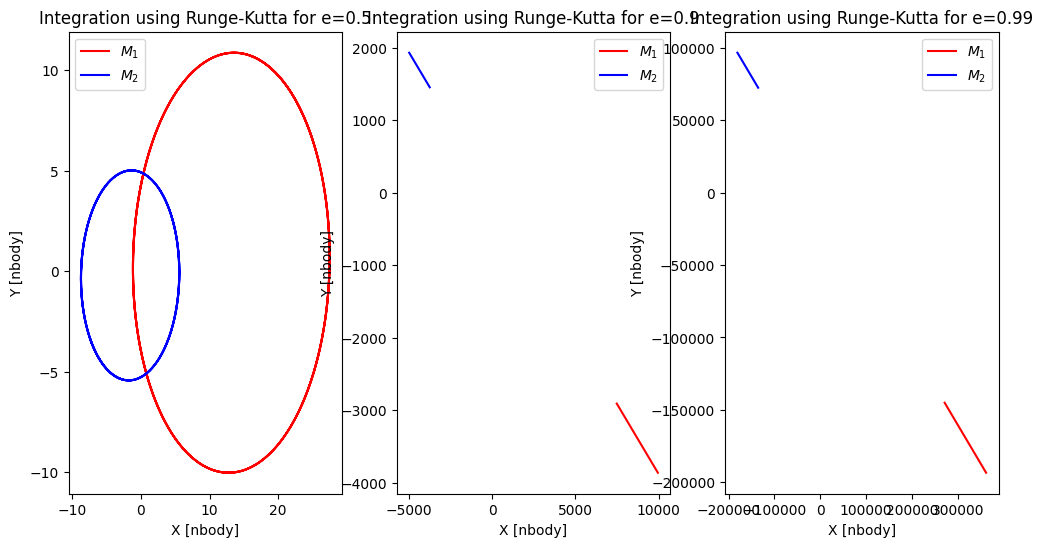

In [9]:
# euler 
h_1 = 0.1                   # timestep for e=0.5
h_2 = 1                     # timestep for e=0.9
h_3 = 1                     # timestep for e=0.99
tsimulation_1 = 10*P_1      # end of the simulation for e = 0.5
tsimulation_2 = 10*P_2      # end of the simulation for e = 0.9
tsimulation_3 = 10*P_3      # end of the simulation for e = 0.99
N = 2                       # number of particles

plt.figure(figsize=(12,6))


#e = 0.5

#initialize
t = 0                       
path_1 = []
path_2 = []

while t < tsimulation_1:
    for j in range(1,N):
        result = integrator_rungekutta(part_1, h_1, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
    t += h_1

path_1 = np.array(path_1)
path_2 = np.array(path_2)

#PLOT e = 0.5
plt.subplot(1,3,1)
plt.title('Integration using Runge-Kutta for e=0.5')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()


#e = 0.9

#initialize
t = 0                       
path_1 = []
path_2 = []

while t < tsimulation_2:
    for j in range(1,N):
        result = integrator_rungekutta(part_2, h_2, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
    t += h_2

path_1 = np.array(path_1)
path_2 = np.array(path_2)

#PLOT e = 0.9
plt.subplot(1,3,2)
plt.title('Integration using Runge-Kutta for e=0.9')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()



#e = 0.99

#initialize
t = 0                       
path_1 = []
path_2 = []

while t < tsimulation_3:
    for j in range(1,N):
        result = integrator_rungekutta(part_3, h_3, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
    t += h_3

path_1 = np.array(path_1)
path_2 = np.array(path_2)


#PLOT e = 0.99
plt.subplot(1,3,3)
plt.title('Integration using Runge-Kutta for e=0.99')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()


plt.show()
